# THE SPARKS FOUNDATION

## Data Science and Business Analytics Internship

### Author : Swarnika Fuley

### TASK 1: Prediction Using Supervised Machine Learning

### Problem Statement: Predict the percentage of a student based on the number of hours studied

## Importing Libraries

In [1]:
#Importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

#To ignore the warnings

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [4]:
# Reading Data from remote link
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Describing The Data

In [5]:
#To find the number of rows and columns
print(df.shape)

(25, 2)


In [6]:
#To find the data type
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
#To find the more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#To find the descriptive statistics of dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#Now we will check the null values in dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Visualizing The Data

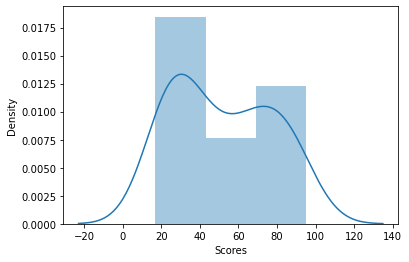

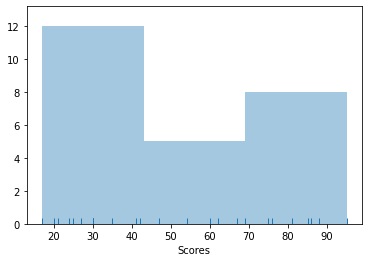

In [11]:
#Plotting the dataset
sns.distplot(df["Scores"])
plt.show()

sns.distplot(df["Scores"], kde=False, rug=True)
plt.show()

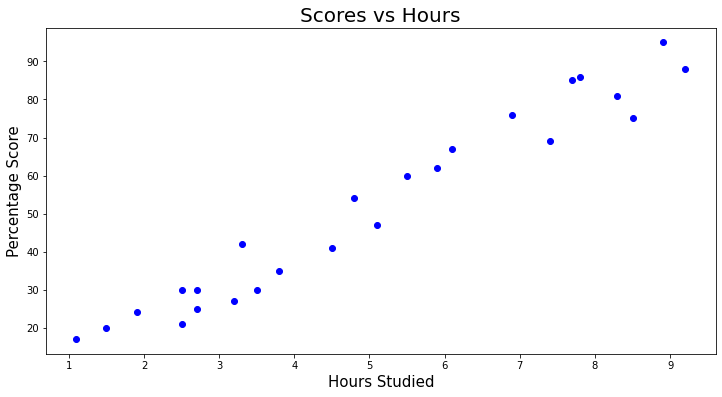

In [12]:
# Plotting the distribution of score
plt.figure(figsize=(12,6))
plt.title('Scores vs Hours', size=20)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Percentage Score', size=15)
plt.scatter(df.Hours,df.Scores,color='blue')
plt.show()

In [13]:
#To determine the correlationn between two variables 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Preparing The Data

In [14]:
#Dividing the data into "attributes"(inputs) and "labels"(outputs).Using the iloc function we will divide the data
x=df.iloc[:, :-1].values
y=df.iloc[:,1].values

In [15]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Splitting Dataset Into Train and Test

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## Model Preparation Using Linear Regression

In [18]:
regressor=LinearRegression()
regressor.fit(x_train.reshape(-1,1),y_train)
print("Training of then model is complete")

Training of then model is complete


## Plotting Linear Regression Model

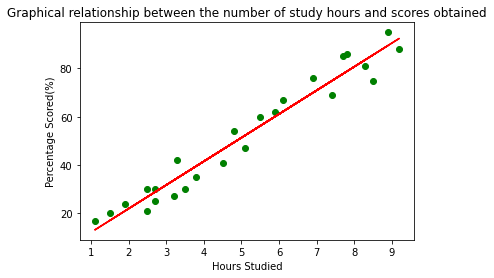

In [19]:
#Plotting the regression line
line=regressor.coef_*x+regressor.intercept_

#Plotting the scatter plot with the regression line
plt.scatter(x,y,color='green',marker='o')
plt.plot(x,line,color='red');
plt.title('Graphical relationship between the number of study hours and scores obtained')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored(%)')
plt.show()

In [20]:
print('intercept={}, slope coefficient={}'.format(regressor.intercept_,regressor.coef_))

intercept=2.3708153823418883, slope coefficient=[9.78856669]


## Predicting Labels Using Linear Regression Model

In [21]:
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


## Comparing Actual and Predicted Results

In [22]:
data=pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [23]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Squared Error 4.7921912746363144
R2: 0.9568211104435257


## Testing The Model With Our Own Data

In [25]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred=regressor.predict(test)
print("No. of hours={}".format(hours))
print("Predicted Score={}".format(own_pred[0]))

No. of hours=9.25
Predicted Score=92.91505723477056


## Therefore, from the above results it can be concluded that the predicted score of a person studying for 9.25 hours is 92.915